# Run the whole deltas algorithm

In [43]:
%load_ext autoreload
%autoreload 2

from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [44]:
N1 = 9990
N2 = 10
data_clf = data.get_non_sep_data(
    N1=N1,
    N2=N2,
    scale=True)

## Get Classifier

clf


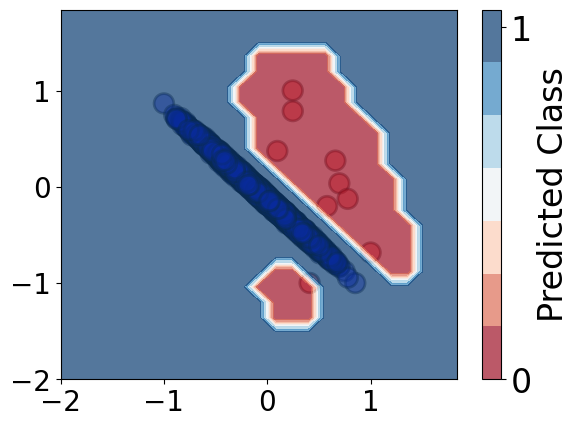

SMOTE


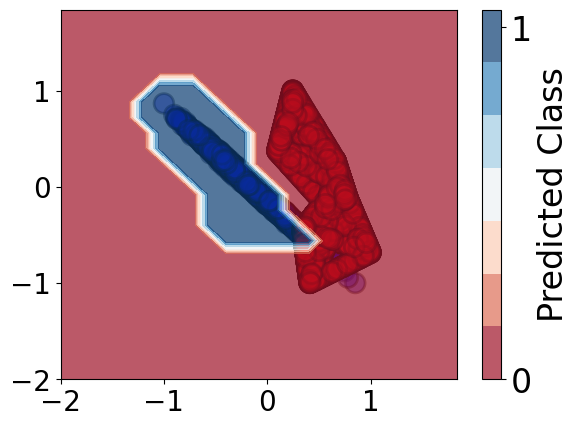

In [45]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=False)
data_clf['clf'] = classifiers_dict['original']                      

## Fit deltas

Original Data


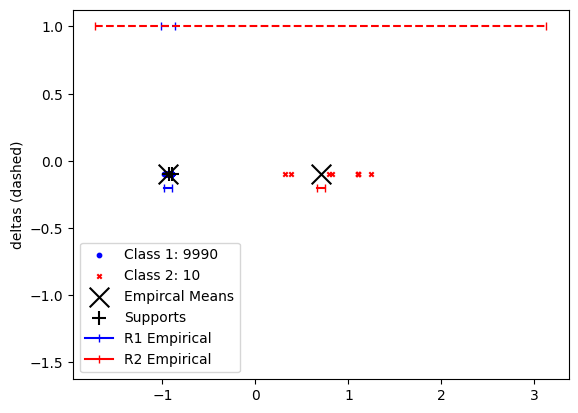

Budget 100 found 3 viable downsampled solutions
Best solution found by removing 2 data points
Downsampled Data:


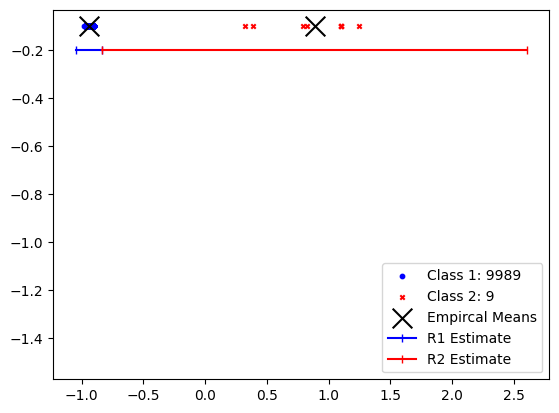

In [46]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, alpha=1, _print=True, _plot=True, max_trials=100, method='supports', parallel=False)

## Show parameters

In [47]:
deltas_model.print_params()
deltas_model.print_deltas()

Parameters
                R:  1.2462272492942128
                N1: 9989
                N2: 9
                R1: 0.041322509858694456
                R2: 0.5630626864421658
                M:  1.221417408189288
                D:  1.825802604490148
                C1: 1
                C2: 1
"
                  delta1: 0.0047 
                  delta2: 0.7365831962620506
                  constraint: 0.0
                  


# Evaluation on test data

original accuracy: 0.80275
SMOTE accuracy: 0.9532
deltas accuracy: 0.9496

original F1: 0.7542821550918717
SMOTE F1: 0.9519901518260155
deltas F1: 0.9469250210614996

original precision0: 0.7171029042667623
SMOTE precision0: 0.9314546839299315
deltas precision0: 0.9084302325581395

original precision1: 1.0
SMOTE precision1: 0.9772535804549284
deltas precision1: 1.0

original


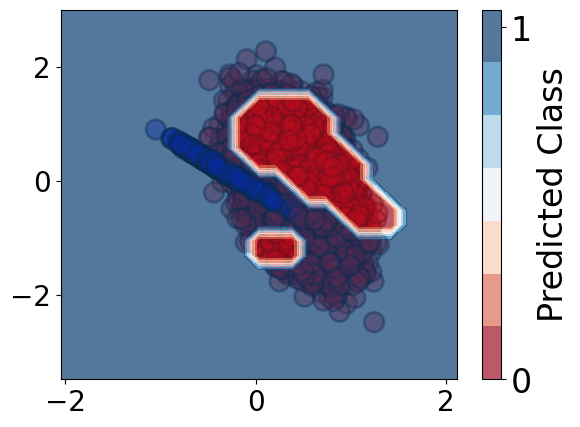

SMOTE


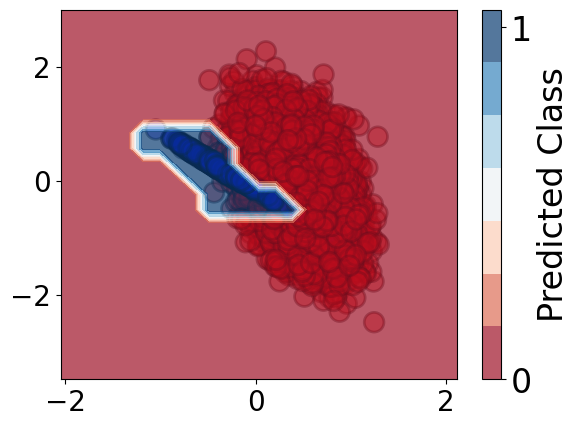

deltas


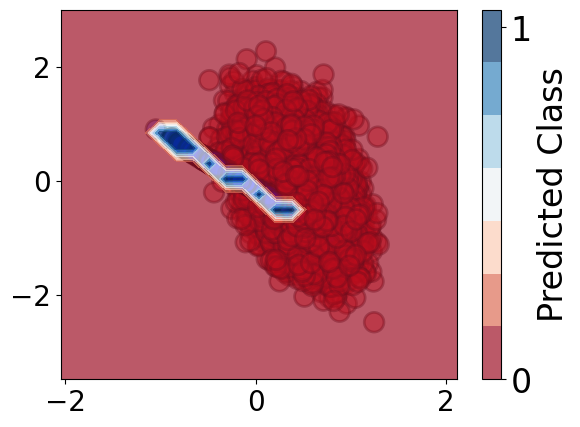

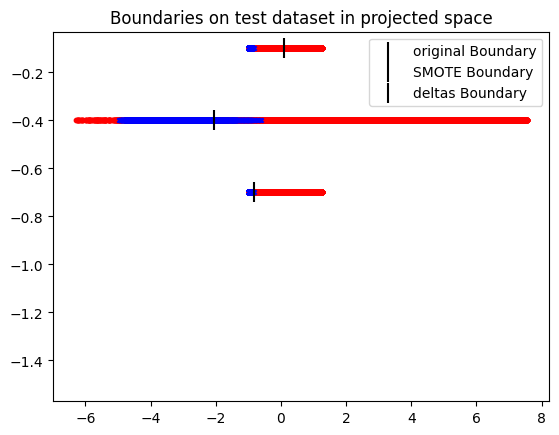

In [48]:
classifiers_dict['deltas'] = deltas_model
evaluation.eval_test(classifiers_dict,
                       data_clf['data_test'], _print=True, _plot=True)